# Measuring Distances in Cosmology

In this notebook, we will introduce various types of distance measurements that describe the separation between galaxies in our universe. By the end of this notebook, you should be able to

- Measure distances in an expanding universe
- Understand the unique properties of different types of distance measurements

## Preferred Backgrounds

While not necessary, having knowledge about the following topics will be helpful in completing this notebook on time:

- How Jupyter cells work
- How basic mathematical functions work
- How we can use graphs to visually depict mathematical functions
- How integral equations in calculus work

## Setup

Run the below cell to load some tools that we will use in the notebook.

In [27]:
# Basic Python packages we need to run this notebook.
# In case your computer does not have these packages installed, please raise your hand and your instructor can help you.
# If you are python savvy, then you can consider running in a separate notebook cell: 
# !pip install astropy numpy matplotlib scipy

from astropy.cosmology import FlatLambdaCDM, LambdaCDM
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from scipy.interpolate import InterpolatedUnivariateSpline
%matplotlib widget


## 1 - The Scale of Our Universe

Our Sun in one of hundreds of billions of stars that live in the Milky Way Galaxy. If we zoom out of our galaxy, we find that the Milky Way is one of many galaxies in our universe, a fact that was first [discovered by astronomers in the early 1900s](<https://en.wikipedia.org/wiki/Great_Debate_(astronomy)>). 

The below animation shows what it would look like to fly away from the Milky Way. As the spiral arms of our galaxy recede into the dark, other galaxies become visible, each separated from one another by vast distances.

![title](desihigh/images/scale_animation.gif)

Image credit: Fiske Planetarium and the DESI Collaboration

To make a three-dimensional map of the universe like the one pictured above, we need to measure the distances to far way galaxies and figure out where they are located. There are several types of distance measurements, often referred to as **distance measures**, that we are interested in. 

Some distance measures describe the **line-of-sight** distance between us here on Earth and far away galaxies. This is the line-of-sight distance along which light travels from far away galaxies to reach the Milky Way, and eventually, our eyes (or our telescopes). The below diagram shows the line-of-sight distance to two galaxies. If these two galaxies are in different parts of the night sky, then there will be some **angular separation** between their lines-of-sight. And, if we suppose that our two galaxies have the same line-of-sight distance to Earth, we can also describe the notion of a **transverse** distance between the galaxies.

<img src="desihigh/images/distance_angles.png" alt="drawing" width="650"/>

Keep in mind these notions of line-of-sight and transverse distance as we move through the notebook. We will encounter a multitude of different distance measures, some of which describe line-of-sight distances and some of which describe transverse distances.  

### 1.1 - What Does it Mean to Measure a Distance?

In our everyday lives, we think of the distance between two points as being a fixed quantity. If there is a kilometer between points A and B, then that has always been the distance between points A and B, and that always will be the distance between points A and B. 

However, physics tells us that this isn't always the case. For example, in Albert Einstein's theory of Special Relativity, the distance between two galaxies is measured to be shorter when the observer is moving towards or away from the galaxies. The faster the observer moves, the shorter the measured distance. This phenomenon is called length contraction and is one example of how physics causes distances to behave in ways that are non-intuitive.

In cosmology, there are a variety of types of distances that we are interested in measuring, and just like in Special Relativity, these distance measures are influenced in surprising ways by physics. 

### 1.2 - The Expanding Universe: How Distances Change Over Time

Because our universe is expanding, the distance between any two points A and B will increase with time. The below animation shows an analogy for this expansion, where the universe is depicted as the surface of a sphere, and the sphere gets larger as time goes on. If you pick two of the galaxies in the animation and track them, you'll notice that the distance between the galaxies increases as the universe expands.

![title](desihigh/images/expansion_animation.gif)

Image credit: European Space Agency

Let's describe this expansion in a more mathematical way. An observer who lived far in the past (at time $t$) would measure the distance between two galaxies to have a certain value $d(t)$. If we measure the distance between those two galaxies today in the present (at time $t_f$), we will measure a larger distance: $d(t_f) > d(t)$. The ratio between the past and present distance is called the scale factor $a(t)$, and it describes how small the universe was in the past compared to today.

$$a(t) = \frac{d(t)}{d(t_f)}$$

Let's try modeling how big the universe was at various times using the scale factor.

In [2]:
# Create a cosmological model for converting redshifts to distances
cosmological_model = FlatLambdaCDM(Om0=.315, H0=67.4)

# To translate a time t into a scale factor a(t), we will use a redshift z(t) as an intermediate quantity
# -------------------------------------------------------------------------------------------------------

# Create some example redshift values (1*10^6 values between 0 and 1*10^3)
redshifts =  np.linspace(0, 1e3, int(1e6))

# Create a function z(t) using our example z values
time_to_redshift = InterpolatedUnivariateSpline(cosmological_model.age(redshifts)[::-1], redshifts[::-1])

# loop through a few ages (in units of billions of years)
for age_snapshot in [.1, 1, 5, 13.8]:
    
    # age_snapshot is our time t

    # Our scale factor a is calculated as a(z(t)) 
    scale_factor = cosmological_model.scale_factor(time_to_redshift(age_snapshot))

    # Report how big the universe was in the past compared to today (13.8 billion years old)
    print(f'At an age of {age_snapshot} billion years, the scale factor is {scale_factor:.3f}')


At an age of 0.1 billion years, the scale factor is 0.032
At an age of 1 billion years, the scale factor is 0.150
At an age of 5 billion years, the scale factor is 0.447
At an age of 13.8 billion years, the scale factor is 1.000


The below code creates a visual representation of how big the universe was at each of the above "age_snapshot" times. Try changing the age_snapshot variable below from 1 to 5 to 13.8 to see the universe expand, with galaxies spreading further apart.

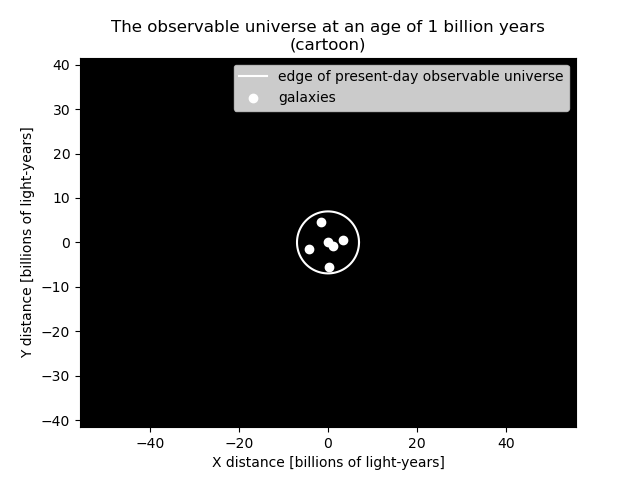

In [3]:
# Try changing this variable from 1 to 5 to 13.8, re-running the code each time
age_snapshot = 1 # Age of the universe in units of billions of years

# The present-day observable universe's radius in units of billions of light years
observable_universe_radius = 46.5 

# The scale factor a(z(t))
scale_factor = cosmological_model.scale_factor(time_to_redshift(age_snapshot))

# Here we create a cartoon universe that expands over time
# --------------------------------------------------------

# Let's plot the edge of the modern day observable universe. As time goes on, light from the unobservable part 
# of the universe will travel and reach us, causing the radius of the observable universe to grow. 
# This is a seperate effect from the universe's expansion, and we are not going to model it.
# Hence, we will plot the time evolution of the "present-day" observable universe's radius.

# The y axis coordinates of the circle denoting the observable universe's boundary
circle_y = [scale_factor*observable_universe_radius*np.sin(theta) for theta in np.linspace(0, 2*np.pi, 100)]

# The y axis coordinates of the circle denoting the observable universe's boundary
circle_x = [scale_factor*observable_universe_radius*np.cos(theta) for theta in np.linspace(0, 2*np.pi, 100)]

# Create a plot
plt.figure()

# Plot the circle
plt.plot(circle_x, circle_y, color='white',label='edge of present-day observable universe')

# Let's plot the locations of some galaxies. DESI alone will map out tens of millions of galaxies, 
# but for simplicity, let's put six fictitious galaxies in our model.
plt.scatter(circle_x[2]*.5, circle_y[2]*.5,c='white',label='galaxies')
plt.scatter(circle_x[30]*.7, circle_y[30]*.7,c='white')
plt.scatter(circle_x[55]*.65, circle_y[55]*.65,c='white')
plt.scatter(circle_x[75]*.8, circle_y[75]*.8,c='white')
plt.scatter(circle_x[90]*.2, circle_y[90]*.2,c='white')
plt.scatter(0, 0, c='white')

# Some graph settings
plt.axis('equal');
plt.gca().set_facecolor("black") # Create a black back background
plt.xlim(-1.2*observable_universe_radius,1.2*observable_universe_radius) # Set the domain of the graph
plt.ylim(-1.2*observable_universe_radius,1.2*observable_universe_radius); # Set the range of the graph
plt.xlabel('X distance [billions of light-years]') # Create a label for the x-axis of the graph
plt.ylabel('Y distance [billions of light-years]') # Create a label for the y-axis of the graph
plt.legend(loc='upper right') # Set the location of the graph's legend
plt.title(f'The observable universe at an age of {age_snapshot} billion years\n(cartoon)'); # Create a title for the graph

Another way to visualize the universe's expansion is to plot how the scale factor changes over time.

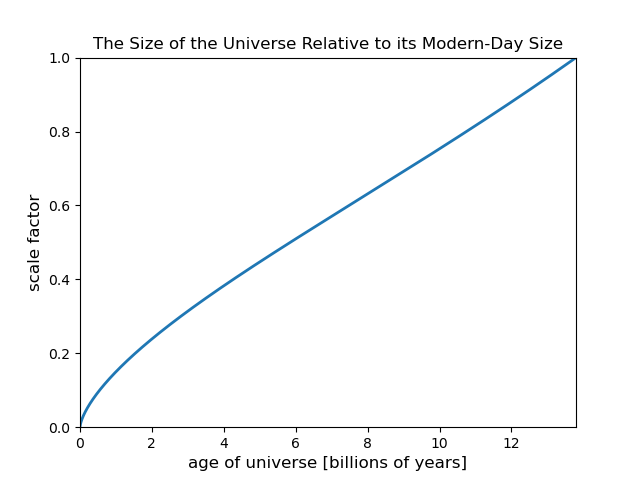

In [4]:
# The modern age of the universe at a redshift of z=0
age_of_universe = cosmological_model.age(0).value

# Let's plot the scale factor vs. the age of the universe
# --------------------------------------------------------

# Age values
age = np.linspace (1e-3, age_of_universe, 10000) 

# Scale factor values
scale_factor = cosmological_model.scale_factor(time_to_redshift(age)) 

# Create a plot
plt.figure() 

# Plot scale factor vs. age
plt.plot(age, scale_factor, linewidth=2)

# Plot settings
plt.xlim(0, age_of_universe) # Set the domain of the graph
plt.ylim(0, 1) # Set the range of the graph
plt.xlabel('age of universe [billions of years]', fontsize = 12) # Create a label for the x-axis of the graph
plt.ylabel('scale factor', fontsize = 12) # Create a label for the y-axis of the graph
plt.title('The Size of the Universe Relative to its Modern-Day Size'); # Create a title for the graph

This plot shows us the same information as our previous visualization of the universe's size, except instead of looking at a single *age_snapshot* value, we are now looking at how the universe's size (the scale factor) changes across the universe's entire history.

Now that we've introduced the scale factor, we're ready to start talking about the types of distances that we measure in Cosmology.

## 2 - Line-of-Sight Distances in Cosmology

Since the **physical distance** between two galaxies A and B changes over time, cosmologists often use the concept of an equivalent **comoving distance**, which is defined to preserve a constant distance between A and B. While the physical distance between the galaxies expands over time, the comoving distance between them stays the same. A comoving distance ruler then expands over time at the same rate as the universe. The physical distance $x(t)$ and comoving distance $D_C$ are related by the scale factor:

$$ x(t) = a(t) D_C $$

As you might have seen in the [introduction notebook](https://github.com/DESIHIGH/desihigh/blob/main/Intro.ipynb), the measured **redshift** $z$ to a galaxy is a proxy for its distance from us. We can use a cosmological model to plot the line-of-sight comoving distance as a function of redshift (by "line-of-sight," we mean the disntace between a galaxy and Earth, aka the line along which light travels from the galaxy to reach our eyes. TODO: move line of sight and transverse explanations to intro. They cause clutter here).

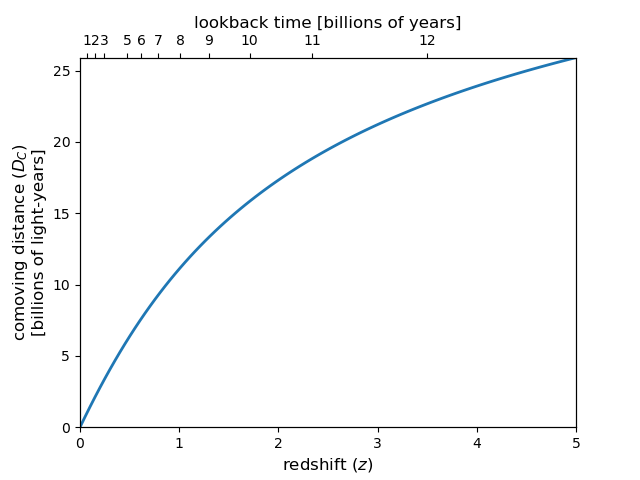

In [10]:
# Let's plot redshift vs. comoving distance
# -----------------------------------------

# Redshift values 
redshift = np.linspace(0,5,100)

# Comoving distance values
comoving_distance = cosmological_model.comoving_distance(redshift).value * 3.261598 * 1e-3 #unit conversion

# Create a plot
plt.figure()

# Plot comoving distance vs. redshift
plt.plot(redshift, comoving_distance, linewidth=2)

# Plot settings
plt.xlim(0, 5) # Set the domain of the graph
plt.ylim(0, np.max(comoving_distance)) # Set the range of the graph
plt.xlabel('redshift ($z$)', fontsize = 12) # Create a label for the x-axis of the graph
plt.ylabel('comoving distance ($D_C$)\n[billions of light-years]', fontsize = 12) # Create a label for the y-axis of the graph
ax2 = plt.gca().twiny() # Create an overlay for the plot 
ax2.set_xlim(0, 5) # Set the domain of the overlay
xticks = [.073, .153, .245, .473, .615, .79, 1.01, 1.3, 1.71, 2.34, 3.5] # Create tick mark values for the overlay
ax2.set_xticks(xticks) # Apply tick mark values to the overlay
xticks_labels = [f"{x:.0f}" for x in cosmological_model.lookback_time(xticks).value] # Create numveric labels for the tick marks
ax2.set_xticklabels(xticks_labels) # Apply the numeric lables
ax2.set_xlabel("lookback time [billions of years]", fontsize = 12); # Create a label for the overlay


We have also plotted the **lookback time**, the amount of time it has taken for the light we observe in a distant galaxy to travel to us. Galaxies with higher redshifts are located further away from us, and it has then taken longer for their light to reach us.

Use the above plot to answer the following question: If a galaxy has a measured redshift of $z=2$, how long did it take for it's light to travel and reach us? What is the comoving distance to the galaxy? Once you have an answer, **enter it into and run the below code**, which will use the scale factor to calculate the physical distance to the galaxy.

In [ ]:
lookback_time = # Enter your answer here (in units of billions of years)
comoving_distance = # Enter your answer here (in units of billions of light-years)

# Scale factor at a redshift of z=2
scale_factor = cosmological_model.scale_factor(2)

# Physical distance to the galaxy back when the light we see was first emmited
physical_distance = scale_factor * comoving_distance 

print(f'The light we see from this galaxy traveled for {lookback_time} billion years to reach us.\nBack then, the physical distance to the galaxy was {physical_distance:.3f} billion light years')

# Scale factor at a redshift of z=0
scale_factor = cosmological_model.scale_factor(0) 

# Physical distance to the galaxy today
physical_distance = scale_factor * comoving_distance 

print(f'Today, when the light has reached us, the physical distance to the galaxy has increased to {physical_distance} billion light years')

The below code gives the official answer for our galaxy. How does your estimate compare?

In [11]:
# Lookback time for a redshift of z=2
lookback_time = cosmological_model.lookback_time(2).value

# Scale factor at a redshift of z=2
scale_factor = cosmological_model.scale_factor(2) 

# Comoving distance for a galaxy at redshift z=2
comoving_distance = cosmological_model.comoving_distance(2).value 

# Physical distance to the galaxy back when the light we see was first emmited
physical_distance = scale_factor * comoving_distance * 3.261598 * 1e-3 #unit conversion

print(f'The light we see from this galaxy traveled for {lookback_time:.3f} billion years to reach us.\nBack then, the physical dintance to the galaxy was {physical_distance:.3f} billion light years')

# Scale factor at a redshift of z=0
scale_factor = cosmological_model.scale_factor(0) 

# Comoving distance for a galaxy at redshift z=2
comoving_distance = cosmological_model.comoving_distance(2).value 

# Physical distance to the galaxy today
physical_distance = scale_factor * comoving_distance * 3.261598 * 1e-3 #unit conversion

print(f'Today, when the light has reached us, the physical distance to the galaxy has increased to {physical_distance:.3f} billion light years')


The light we see from this galaxy traveled for 10.523 billion years to reach us.
Back then, the physical dintance to the galaxy was 5.775 billion light years
Today, when the light has reached us, the physical distance to the galaxy has increased to 17.326 billion light years


Let's take another look at our redshift vs. comoving distance graph, this time focusing on low redshifts (red shaded region):

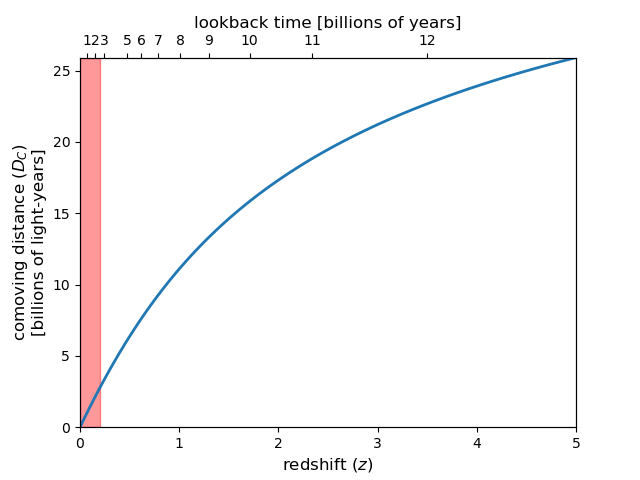

In [12]:
# Let's plot redshift vs. comoving distance
# -----------------------------------------

# Reshift values
redshift = np.linspace(0,5,100)

# Comoving distance values
comoving_distance = cosmological_model.comoving_distance(redshift).value * 3.261598 * 1e-3 #unit conversion

# Create a plot
plt.figure()

# Shade in the low redshift values in red
plt.axvspan(0, .2, alpha=0.4, color='red')

# Plot comoving distance vs. redshift
plt.plot(redshift, comoving_distance, linewidth=2)

# Plot settings
plt.xlim(0, 5) # The domain of the plot
plt.ylim(0, np.max(comoving_distance)) # The range of the plot
plt.xlabel('redshift ($z$)', fontsize = 12) # Create a label for the x-axis of the graph
plt.ylabel('comoving distance ($D_C$)\n[billions of light-years]', fontsize = 12) # Create a label for the y-axis of the graph
ax2 = plt.gca().twiny() # Create an overlay for the plot 
ax2.set_xlim(0, 5) # Set the domain of the overlay
xticks = [.073, .153, .245, .473, .615, .79, 1.01, 1.3, 1.71, 2.34, 3.5] # Create tick mark values for the overlay
ax2.set_xticks(xticks) # Apply tick mark values to the overlay
xticks_labels = [f"{x:.0f}" for x in cosmological_model.lookback_time(xticks).value] # Create numveric labels for the tick marks
ax2.set_xticklabels(xticks_labels) # Apply the numeric lables
ax2.set_xlabel("lookback time [billions of years]", fontsize = 12); # Create a label for the overlay



In the red shaded region, the slope of the blue line is nearly constant. This means that at low redshift, we can use the equation of a line (Hubble's law) to calculate the comoving distance to a galaxy from a measured redshift. 

$$D_C=\frac{c}{H_0}z$$

Here we are calculating the comoving distance $D_c$ as a function of the redshift $z$. The slope of our line is $\frac{c}{H_0}$, where $c$ is the speed of light, and $H_0$ is the Hubble Constant, a measure of the universe's expansion rate. How then can we calculate the comoving distance in the rest of the plot, where the blue line curves? To measure the comoving distance at larger redshifts, we can use an integral version of the above equation (don't worry if this math notation is unfamiliar to you):

$$ D_C = \frac{c}{H_0}\int_0^z \frac{\mathrm{d}z'}{E(z')}$$

$$ E(z') = \sqrt{\Omega_M (1+z')^3 + \Omega_\Lambda} $$

Here $\Omega_M$ is the percentage of the universe made up of matter, and $\Omega_\Lambda$ is the percentage of the universe made up of dark energy. For the cosmological model that we have been using, $\Omega_M=0.315$ (31.5%) and $\Omega_\Lambda=0.685$ (68.5%)

Whenever we use a python package to calculate the comoving distance, under the hood, it is solving an integral equation similar to the one above, with user-provided values for the cosmological parameters. **Try changing the $\Omega_M$ (omega_matter) parameter** to different values between 0 (no matter, all dark energy) and 1 (all matter, no dark energy) to see how the calculated distance changes

In [16]:
omega_matter = .315 # Try changing this between 0 and 1

# Create a cosmological model with our omega_matter value. We will assume that the Hubble constant is H_0 = 67.4 km/s/Mpc
new_cosmological_model = FlatLambdaCDM(Om0=omega_matter, H0=67.4)

# Our galaxy has a measured redshift of z=2
redshift = 2 

# Get the comoving distance to our galaxy
comoving_distance = new_cosmological_model.comoving_distance(redshift).value * 3.261598 * 1e-3 #unit conversion

print(f'Our galaxy has a comoving distance of {comoving_distance:.3f} billion light-years')

Our galaxy has a comoving distance of 17.326 billion light-years


That's quite a bit of variation! In order to make an accurate distance measurement, we need accurate values of $\Omega_M$, $\Omega_\Lambda$, $H_0$, and other, similar cosmological parameters. Cosmologists are confident in modern measurements of these values, though there are conflicting measurements for $H_0$, a dilemma that we call the "Hubble tension." Addressing this tension is a major research effort in cosmology.

## 3 - Transverse Comoving Distance

The concept of comoving distance that we've introduced so far can be used to describe how far away distant galaxies are from us. Let's think about another scenario now. Say that there are two galaxies that are both the same distance away from us. These two galaxies are in different parts of the night sky, meaning that there is some unknown separation distance between them. How can we calculate this unknown **transverse comoving distance**?

To illustrate this scenario, let's look at a [view of the night sky](https://www.legacysurvey.org/viewer?ra=185.7149&dec=7.0396&layer=ls-dr9&zoom=11) taken by the [DESI legacy imaging survey](https://www.legacysurvey.org/). There are quite a few galaxies visible here. If we pretend that the two galaxies separated by the orange line are the same distance from Earth, then what is the transverse comoving distance between them (the length of the orange line)? 

<img src="desihigh/images/transverse_distance_0.png" alt="drawing" width="650"/>

It turns out that the answer to this question isn't so simple. The answer depends on how the light from these galaxies travels through curved space on its way to Earth. You might have heard that in Albert Einstein's theory of gravity, massive objects like stars and planets cause space to curve and light beams to bend.

![title](desihigh/images/Light_Bending.gif)

image credit: NASA

For the light from our two galaxies, we don't need to worry much about the effect of stars and planets, but we do need to worry about the possibility that on much larger scales, space in our universe has an overall curvature. If space in our universe has an overall curvature, then the light from our galaxies will bend, and their apparent separation won't represent the true distance between them, at least not until we factor in the curvature. We describe the curvature with a parameter called $\Omega_k$, where if $\Omega_k=0$, space is flat, and if $\Omega_k$ has any other value, positive or negative, then space is curved.

Let's add curvature with $\Omega_k$ to our cosmological model from earlier. We will assume that the redshift to our two galaxies is $z=2$ and that they have an angular separation on the sky of one degree. Try changing the value of $\Omega_k$ between -0.5, 0, and 0.5 to see how the transverse distance between our galaxies changes

In [22]:

omega_k = 0.0 # Try changing this value

# Create a cosmological model for converting redshifts to distances
# The model will now incorporate omega_k
cosmological_model = LambdaCDM(Om0= 0.315*(1 - omega_k), Ode0 = 0.685*(1 - omega_k), H0=67.4)

# The redshift of both galaxies
redshift = 2

# Transverse comoving distance for angular seperation of 57.3 degrees (or one radian)
transverse_distance_radian = cosmological_model.comoving_transverse_distance(redshift).value * 3.261598 * 1e-3 # Unit conversion

# Transverse distance for angular sepration of 1 degree (the assumed separation of our galaxies)
transverse_distance = transverse_distance_radian / 57.3

print(f'The transverse distance between the galaxies is {transverse_distance:.3f} billion light years')


The transverse distance between the galaxies is 0.302 billion light years


We can see that to accurately determine transverse distances, we need to first determine what the value of  $\Omega_k$ in our universe is.

You might be interested in what's going on under the hood when our model calculates the transverse comoving distance $D_M$. No worries if this math is unfamiliar to you.

$$ D_M = \begin{cases}
      A \sinh{\left(D_C/A\right)} & \text{if } \Omega_k>0 \text{ (hyperbolic geometry)}\\
      D_C & \text{if } \Omega_k=0 \text{ (Euclidean geometry)}\\
      A \sin{\left(D_C/A\right)} & \text{if } \Omega_k>0 \text{ (elliptic geometry)}
    \end{cases} $$

$$A=\frac{c}{H_0\sqrt{\Omega_k}}$$

Here, the transverse comoving distance $D_M$ is calculated in terms of the previously described line-of-sight comoving distance $D_C$. The calculation also depends on a constant $A$, which is determined by the value of $\Omega_k$. The different scenarios for $\Omega_k$ correspond to the possibilities of our universe having different types of Euclidean or non-Euclidean geometries (again, no worries if this math is unfamiliar to you.)

Our most up to date measurements suggest that the universe has no curvature ($\Omega_k=0$), meaning that the transverse comoving distance is simply $D_M=D_C$ 

Recall that to convert any comoving distance to a physical distance, we need to multiply by the scale factor at a given time $a(t)$.

$$ x(t) = a(t) D_M $$

The formula for the transverse distance $D_M$ by default calculates the transverse distance of objects separated by 57.3 degrees (or one radian). In this case, the physical distance is equivalent to a special quantity called the angular diameter distance $D_A$.

$$ D_A = a(t) D_M $$

The angular diameter distance tells us the ratio between the physical transverse distance and the angular separation between our two galaxies. We might expect that the angular diameter distance increases with line-of-sight distance. For example, if you shine two flashlights in different directions, the light beams will grow further apart from each other while maintaining a constant angular separation. Should we expect to see the same trend with the light beams that we receive from distant galaxies? Let's use a cosmological model to find out.

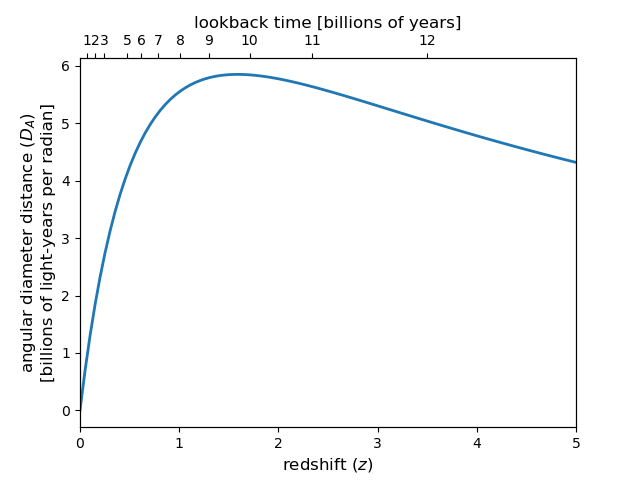

In [24]:

# Create a cosmological model for converting redshifts to distances
cosmological_model = FlatLambdaCDM(Om0=.315, H0=67.4)

# Let's plot redshift vs. angular diameter distance
# -------------------------------------------------

# Redshift values
redshift = np.linspace(0,5,100)

# Angular diameter distance values
angular_diameter_distance = cosmological_model.angular_diameter_distance(redshift).value * 3.261598 * 1e-3 #unit conversion

# Create a plot
plt.figure()

# Plot redshift vs. angular diameter distance
plt.plot(redshift, angular_diameter_distance, linewidth=2)

# Plot settings
plt.xlim(0, 5) # The domain of the plot
plt.xlabel('redshift ($z$)', fontsize = 12) # Create a label for the x-axis of the graph
plt.ylabel('angular diameter distance ($D_A$)\n[billions of light-years per radian]', fontsize = 12) # Create a label for the y-axis of the graph
ax2 = plt.gca().twiny() # Create an overlay for the plot 
ax2.set_xlim(0, 5) # Set the domain of the overlay
xticks = [.073, .153, .245, .473, .615, .79, 1.01, 1.3, 1.71, 2.34, 3.5] # Create tick mark values for the overlay
ax2.set_xticks(xticks) # Apply tick mark values to the overlay
xticks_labels = [f"{x:.0f}" for x in cosmological_model.lookback_time(xticks).value] # Create numveric labels for the tick marks
ax2.set_xticklabels(xticks_labels) # Apply the numeric lables
ax2.set_xlabel("lookback time [billions of years]", fontsize = 12); # Create a label for the overlay


This is a surprise! The angular diameter distance first increases with line-of-sight distance (redshift) as we expect, but past a redshift of around 2, the trend reverses, and the angular diameter distance then decreases with the line-of-sight distance. What's happening here? The cause of this reversal is the scale factor $a(t)$. As we consider higher redshifts, the size of the universe $a(t)$ decreases, while the transverse distance $D_M$ increases. At a high enough redhsift, the effect of $a(t)$ decreasing becomes more signifigant than the effect of $D_M$ increasing, and the trend in the angular dimater distance reverses.

## 4 - Luminosity Distance

We will motivate the notion of **luminosity distance** using a real-life example.

Imagine a lightbulb glowing in a dark room. You may have noticed that, along with light, the bulb also emits some heat. As you move further away from the bulb, both the heat and the brightness you perceive decrease. In a sense, the amount of energy received from the bulb at a given point is **inversely proportional** to your distance from it.

We can quantify this observation using a simple formula:

$$F=\frac{L}{4\pi d^2}$$

Here:  
- \(L\) is the **luminosity** of the light source (the energy it emits per unit time),  
- \(d\) is the **distance** from the light source, and  
- \(F\) is the **flux** measured by an observer at distance \( d \) (i.e. the energy received per unit time per unit area).

To understand this equation better, imagine the light from the bulb spreading uniformly in all directions, forming a large **sphere** of radius \(d\) (See the figure below). The total energy from the source is now distributed over the surface area of that sphere, which is ( $4\pi d^2 $). So, the energy per unit area received at any point on that sphere is energy per unit time from the source divided by the area across which it is spread.


<img src="desihigh/images/fl_relation.svg" alt="drawing" width="450"/>

But how is this useful?

Let’s rearrange the equation slightly:

$$
d = \sqrt{\frac{L}{4\pi F}}
$$

If we know the luminosity \( L \) of the bulb (say, from its power rating—60W, 100W, etc.), and we can **measure** the flux \( F \) at some point, we can easily **calculate how far away** we are from the bulb!

This idea becomes a powerful tool in **astronomy** for measuring distances. Of course, the light sources in astronomy aren’t 100W bulbs—they’re **exploding stars** called **supernovae**, which can emit an enormous amount of energy in a very short time (luminosities on the order of $10^{47} W$ !!).

In particular, a type of supernova known as **Type Ia supernovae (SNIa)** has the remarkable property of having nearly **identical peak luminosities**. This allows us to calculate their distance from Earth using their measured flux. Because of this, SNIa are often called **"standard candles"** and are crucial tools for cosmologists trying to understand the structure and expansion of the universe.

Now, you might wonder: *How is this luminosity distance different from other distances we've talked about?*

In a **static** (non-expanding) universe, there would be no difference—all the distances we’ve discussed (angular diameter distance, transverse comoving distance, and luminosity distance) would be the same.

But in our **expanding universe**, things get more interesting. In this case, the luminosity distance (inferred from the flux-luminosity relation above), $D_L$ is related to other distance by a simple expression

$$D_L = \frac{D_M}{a(t)}=\frac{D_A}{a(t)^2}$$

Let's plot this distance $D_L$ and see how it compares with the transverse comoving distance

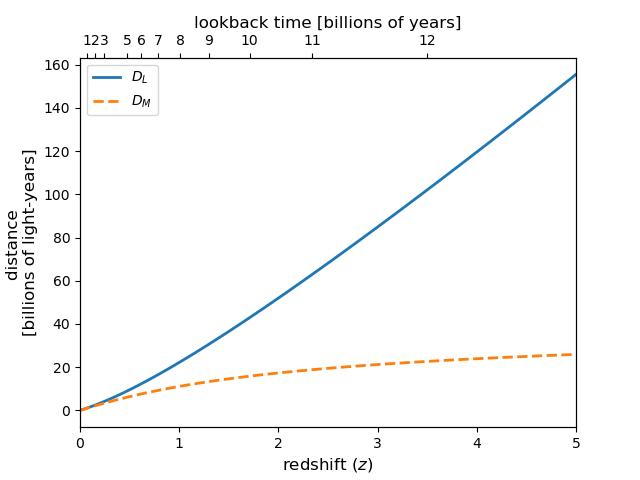

In [25]:
# Create a cosmological model for converting redshifts to distances
cosmological_model = FlatLambdaCDM(Om0=.315, H0=67.4)

# Redshift values
redshift = np.linspace(0,5,100)

# Create a plot
plt.figure()

# Plot luminosity distance vs. redshift
luminosity_distance = cosmological_model.luminosity_distance(redshift).value * 3.261598 * 1e-3 # Unit conversion

# Plot luminosity distance vs. redshift
plt.plot(redshift, luminosity_distance, linewidth=2,label=r"$D_L$")

# Transverse distance values
transverse_distance = cosmological_model.comoving_distance(redshift).value * 3.261598 * 1e-3 # Unit conversion

# Plot transverse distance vs. redshift
plt.plot(redshift, transverse_distance, linewidth=2, ls='--',label=r"$D_M$")


# Plot settings
plt.xlim(0, 5) # The domain of the graph
plt.xlabel('redshift ($z$)', fontsize = 12) # x-axis label
plt.legend() # Add a legend to the graph
plt.ylabel('distance \n[billions of light-years]', fontsize = 12) # y-axis label
ax2 = plt.gca().twiny() # Create an overlay for the plot 
ax2.set_xlim(0, 5) # Set the domain of the overlay
xticks = [.073, .153, .245, .473, .615, .79, 1.01, 1.3, 1.71, 2.34, 3.5] # Create tick mark values for the overlay
ax2.set_xticks(xticks) # Apply tick mark values to the overlay
xticks_labels = [f"{x:.0f}" for x in cosmological_model.lookback_time(xticks).value] # Create numveric labels for the tick marks
ax2.set_xticklabels(xticks_labels) # Apply the numeric lables
ax2.set_xlabel("lookback time [billions of years]", fontsize = 12); # Create a label for the overlay


As expected, $D_L$ is close to $D_M$, only near redshift 0 (a $\sim$ 1). For all higher redshifts $D_L > D_M$ as $a <1$

In the code cell below, we have slightly modified the code above to include sliders for parameters $\Omega_{m,0}$ and $H_0$. Notice the trend in variation of the distances as you vary the parameters $\Omega_{m,0}$ and $H_0$. Does this trend match your expectation?

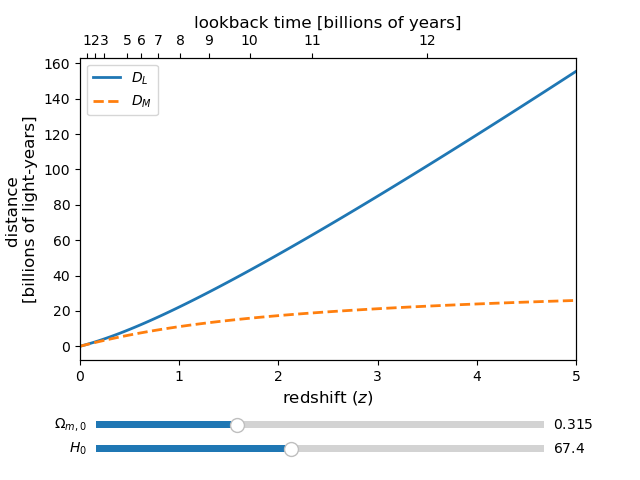

In [29]:
# Initial cosmological parameters
Om0_init = 0.315
H0_init = 67.4

# Redshift range
redshift = np.linspace(0, 5, 100)

# Create figure and adjust layout
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

# Create sliders axes
ax_Om0 = plt.axes([0.15, 0.10, 0.7, 0.03], facecolor='lightgoldenrodyellow')
ax_H0 = plt.axes([0.15, 0.05, 0.7, 0.03], facecolor='lightgoldenrodyellow')

# Create sliders
slider_Om0 = Slider(ax_Om0, r'$\Omega_{m,0}$', 0.0, 1.0, valinit=Om0_init)
slider_H0 = Slider(ax_H0, r'$H_0$', 50.0, 90.0, valinit=H0_init)

# Initial cosmological model
cosmological_model = FlatLambdaCDM(Om0=Om0_init, H0=H0_init)

# Compute distances
luminosity_distance = cosmological_model.luminosity_distance(redshift).value * 3.261598e-3
transverse_distance = cosmological_model.comoving_distance(redshift).value * 3.261598e-3

# Plot initial distances
line_DL, = ax.plot(redshift, luminosity_distance, linewidth=2, label=r"$D_L$")
line_DM, = ax.plot(redshift, transverse_distance, linewidth=2, ls='--', label=r"$D_M$")

# Plot settings
ax.set_xlim(0, 5)
ax.set_xlabel('redshift ($z$)', fontsize=12)
ax.set_ylabel('distance \n[billions of light-years]', fontsize=12)
ax.legend()

# Twin x-axis for lookback time
ax2 = ax.twiny()
ax2.set_xlim(0, 5)

xticks = [.073, .153, .245, .473, .615, .79, 1.01, 1.3, 1.71, 2.34, 3.5]
ax2.set_xticks(xticks)
xticks_labels = [f"{x:.0f}" for x in cosmological_model.lookback_time(xticks).value]
ax2.set_xticklabels(xticks_labels)
ax2.set_xlabel("lookback time [billions of years]", fontsize=12)

# Update function for sliders
def update(val):
    Om0 = slider_Om0.val
    H0 = slider_H0.val
    new_model = FlatLambdaCDM(Om0=Om0, H0=H0)
    
    new_DL = new_model.luminosity_distance(redshift).value * 3.261598e-3
    new_DM = new_model.comoving_distance(redshift).value * 3.261598e-3

    line_DL.set_ydata(new_DL)
    line_DM.set_ydata(new_DM)
    
    # ax.set_ylim(0, max(new_DL.max(), new_DM.max()))

    new_lookback = [f"{x:.0f}" for x in new_model.lookback_time(xticks).value]
    ax2.set_xticklabels(new_lookback)

    fig.canvas.draw_idle()

# Connect sliders to update function
slider_Om0.on_changed(update)
slider_H0.on_changed(update)

plt.show()


### Planning:

We should have a list of all the distance measures at the end as a review

Based largely on https://arxiv.org/pdf/astro-ph/9905116
